In [28]:
# Importing Libs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# My Tools
from toolkit.tools import print_column_uniques, make_df

%matplotlib inline

In [29]:
# Reseting figure size params.
plt.rcParams["figure.figsize"] = [12, 7]

In [30]:
# Setting seaborn as default plotting lib.
sns.set()
sns.set_palette("pastel")

In [55]:
# Creating the dataset.
df = pd.read_csv("../enc_devs_py_2021_fixed.csv")

In [56]:
# COLORS
# ============================
# Light
color_hombres_light = '#8ecae6'
color_mujeres_light = '#ffafcc'
color_neutro_light = '#d4a373'
# Dark
color_hombres_dark = '#023047'
color_mujeres_dark = '#ff006e'
color_neutro_dark = '#ffb703'

# Education

    - About the "education level" of the people who answered the survey.

## General Education
    - column name : 'educacion'

In [57]:
# First lets print the column content.
df["educacion"].value_counts()

Ed. Universitaria                                                           151
Ed. Basica;Ed. Secundaria;Ed. Universitaria                                  42
Ed. Basica;Ed. Secundaria;Ed. Universitaria;Autodidacta                      36
Ed. Universitaria;Autodidacta                                                29
Master                                                                       17
Ed. Secundaria                                                               12
Ed. Basica;Ed. Secundaria                                                    11
Ed. Basica;Ed. Secundaria;Autodidacta                                        10
Ed. Universitaria;Master                                                      8
Ed. Secundaria;Autodidacta                                                    8
Ed. Basica;Ed. Secundaria;Ed. Universitaria;Master                            4
Ed. Universitaria;Master;Autodidacta                                          3
Autodidacta                             

In [58]:
# Printing "unique" values in the column.
print_column_uniques(df, "educacion")

{'Ed. Universitaria', 'Master', 'Ed. Secundaria', 'Autodidacta', 'Doctorado', 'Ed. Basica'}


<Figure size 900x500 with 0 Axes>

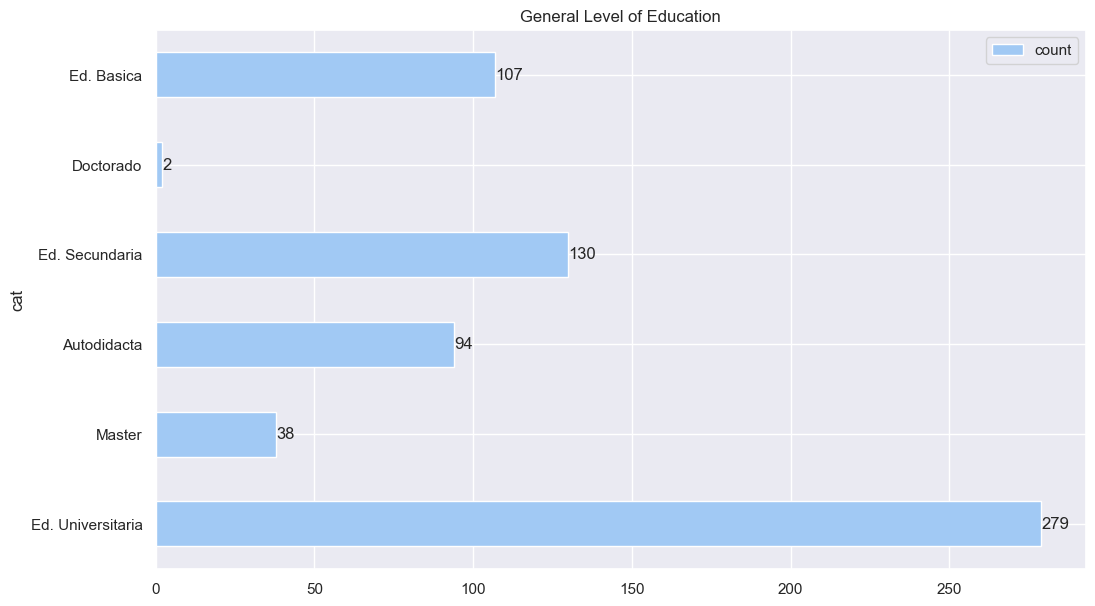

In [59]:
# Making a plot for this column.
fig = plt.figure(figsize=(9, 5))
# Declaring the plot.
nv_ed = make_df(df, "educacion").plot(kind="barh", title="General Level of Education")
# Plot annotations.
for k, v in enumerate([i for i in make_df(df, "educacion")["count"]]):
    nv_ed.annotate(v, (v, k), va="center")

plt.show()

## Carers or Specialties
    - column name : 'carr_especialidades'

In [60]:
# Printing the column content.
df["carr_especialidades"].value_counts()

Ing. Informática                                                        107
Análisis de Sist.                                                        69
Programación;Análisis de Sist.                                           33
Programación;Ing. Informática                                            21
Programación                                                             17
Programación;Análisis de Sist.;Ing. Informática                          17
Ninguna                                                                  15
Análisis de Sist.;Ing. Informática                                       11
Ing. Electrónica                                                          6
Otras                                                                     5
Programación;Análisis de Sist.;Otras                                      5
Ing. Informática;Otras                                                    4
Otras Ing.                                                                4
Análisis de 

<Figure size 900x500 with 0 Axes>

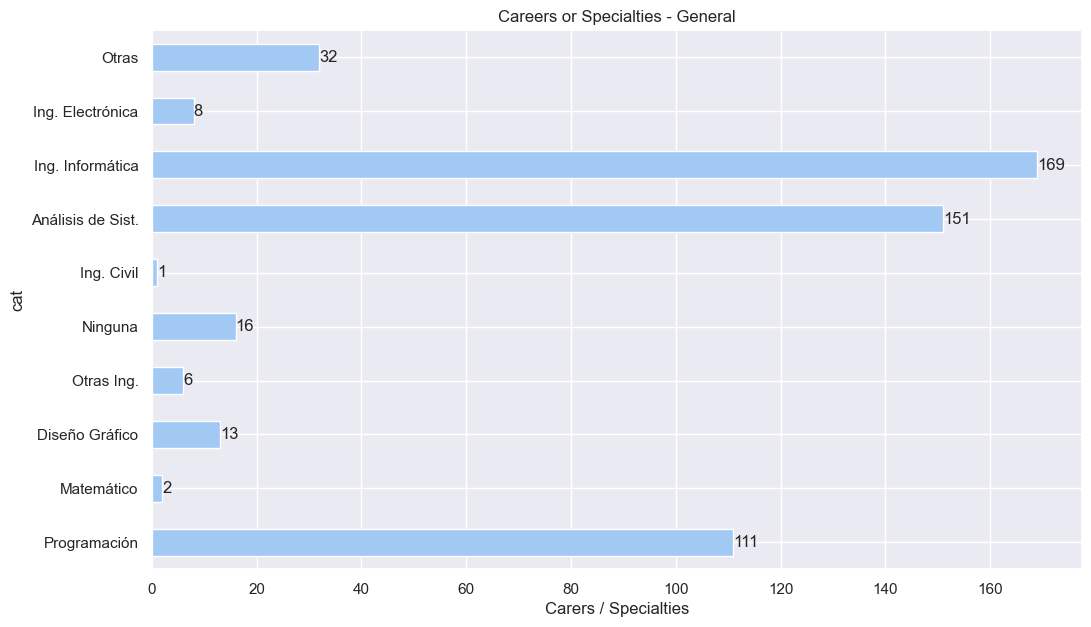

In [61]:
# Creating a plot for this column.
fig = plt.figure(figsize=(9, 5))
# Plot.
carr_df = make_df(df, "carr_especialidades").plot(
    kind="barh",
    title="Careers or Specialties - General",
    xlabel="Carers / Specialties",
    legend=False,
)

# Plot annotations.
for k, v in enumerate([i for i in make_df(df, "carr_especialidades")["count"]]):
    carr_df.annotate(v, (v, k), va="center")
plt.show()

## Importance of Formal Education
    - column name : 'imp_ed_formal'

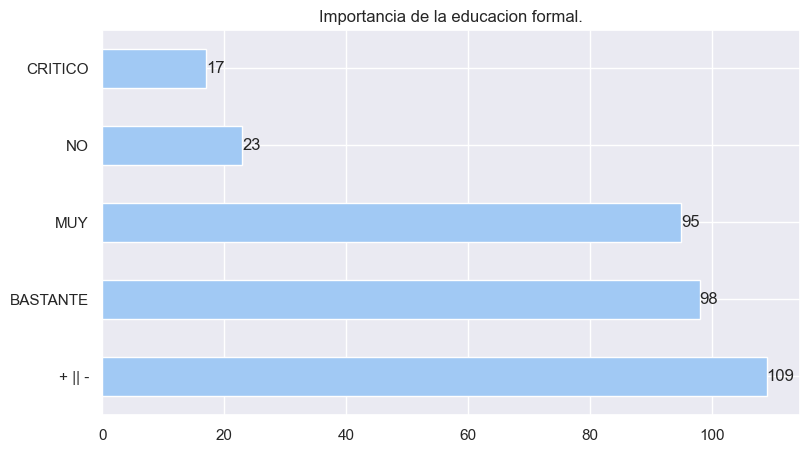

In [62]:
# Ploting a figure for this column.
fig = plt.figure(figsize=(9, 5))
ax1 = plt.subplot(111)
# Plot
exp_df = (
    df["imp_ed_formal"]
    .value_counts()
    .plot(kind="barh", title="Importancia de la educacion formal.")
)
# Plot annotations.
for k, v in enumerate(df["imp_ed_formal"].value_counts().values):
    exp_df.annotate(v, (v, k), va="center")
plt.show()

## Educational Level x Gender

    - We explore the "educational level" of the people who answered the survey by gender.

In [63]:
# Making groups by gender.
gen = df.groupby("genero")

In [64]:
# Print genders keys.
df["genero"].value_counts().keys()

Index(['HOMBRE', 'MUJER', 'NO COMPARTO'], dtype='object')

### Education Level - HOMBRE
    - Education level for the group of MENS. 

In [65]:
# Available Columns:
#'educación'
#'carreras_o_especialidades'
#'importancia_educación_formal'

In [66]:
# Print group 'HOMBRE' and the column 'educacion' with its value counts.
gen.get_group("HOMBRE")["educacion"].value_counts()

Ed. Universitaria                                                           117
Ed. Basica;Ed. Secundaria;Ed. Universitaria                                  37
Ed. Basica;Ed. Secundaria;Ed. Universitaria;Autodidacta                      31
Ed. Universitaria;Autodidacta                                                23
Master                                                                       15
Ed. Secundaria                                                               10
Ed. Basica;Ed. Secundaria                                                     9
Ed. Basica;Ed. Secundaria;Autodidacta                                         8
Ed. Secundaria;Autodidacta                                                    7
Ed. Universitaria;Master                                                      6
Ed. Basica;Ed. Secundaria;Ed. Universitaria;Master                            4
Ed. Basica;Ed. Secundaria;Ed. Universitaria;Master;Autodidacta                2
Autodidacta                             

<Figure size 900x500 with 0 Axes>

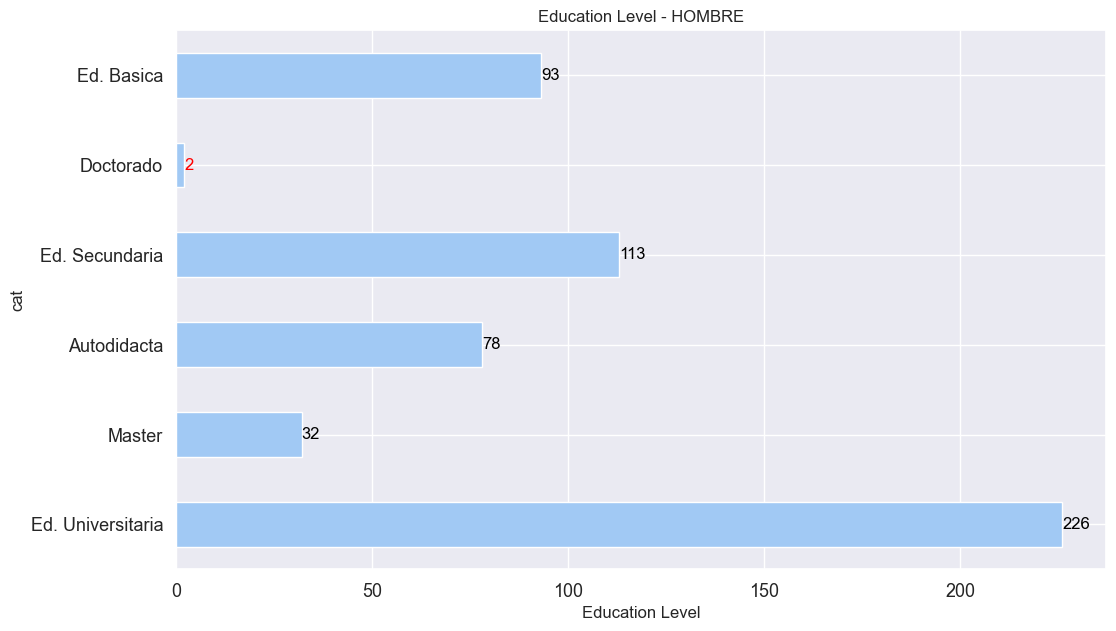

In [67]:
# Making a plot for this 'relation'.
fig = plt.figure(figsize=(9, 5))
# Plot
ed_hombres_df = make_df(gen.get_group("HOMBRE"), "educacion").plot(
    kind="barh",
    title="Education Level - HOMBRE",
    xlabel="Education Level",
    fontsize=13,
    legend=False,
)
# Plot annotations.
for k, v in enumerate(
    [i for i in make_df(gen.get_group("HOMBRE"), "educacion")["count"]]
):
    if v < 10:
        # if count its less than 10, value will be painted in 'red'.
        ed_hombres_df.annotate(v, (v, k), va="center", color="red")
    else:
        # if count its greather than 10, value will be painted in 'blue'.
        ed_hombres_df.annotate(v, (v, k), va="center", color="black")
plt.show()

### Careers or Specialties - HOMBRE

    - Column name : 'carr_especialidades'

In [68]:
# Print 'value counts' of this column.
gen.get_group("HOMBRE")["carr_especialidades"].value_counts()

Ing. Informática                                                        92
Análisis de Sist.                                                       52
Programación;Análisis de Sist.                                          22
Programación;Ing. Informática                                           17
Programación;Análisis de Sist.;Ing. Informática                         15
Programación                                                            15
Ninguna                                                                 13
Análisis de Sist.;Ing. Informática                                       7
Ing. Electrónica                                                         5
Programación;Análisis de Sist.;Otras                                     5
Ing. Informática;Otras                                                   4
Otras Ing.                                                               4
Análisis de Sist.;Otras                                                  3
Otras                    

<Figure size 900x500 with 0 Axes>

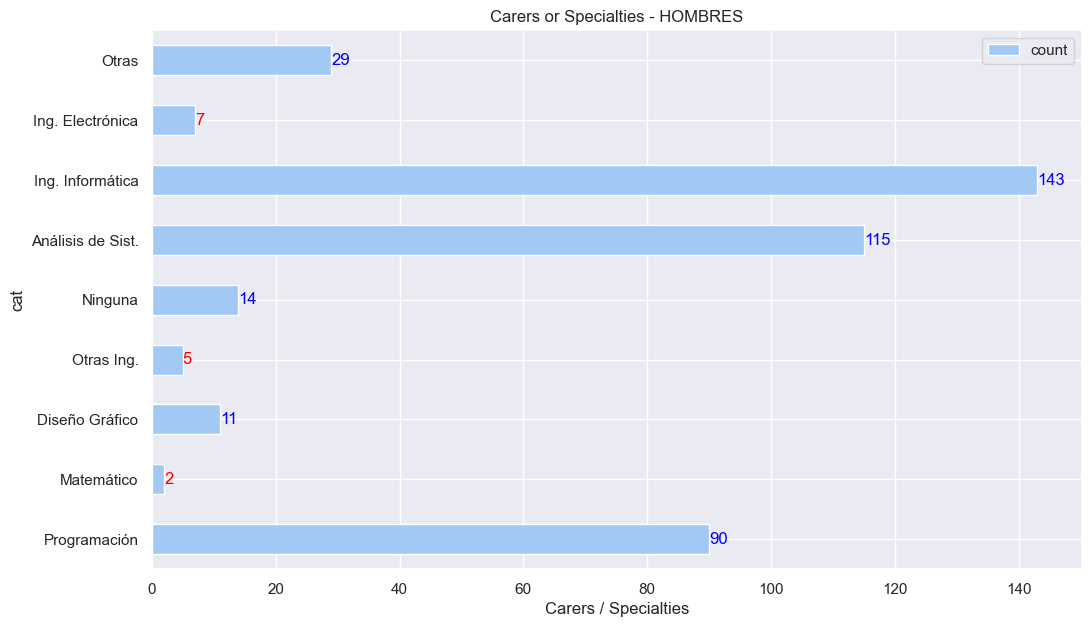

In [69]:
# Making a plot for this column.
fig = plt.figure(figsize=(9, 5))
# Plot
carr_hombres_df = make_df(gen.get_group("HOMBRE"), "carr_especialidades").plot(
    kind="barh",
    title="Carers or Specialties - HOMBRES",
    xlabel="Carers / Specialties",
)
# Plot annotations.
for k, v in enumerate(
    [i for i in make_df(gen.get_group("HOMBRE"), "carr_especialidades")["count"]]
):
    if v < 10:
        # If count its less than 10, value will be painted in 'red'.
        carr_hombres_df.annotate(v, (v, k), va="center", color="red")
    else:
        # If count its greather than 10, value will be painted in 'blue'.
        carr_hombres_df.annotate(v, (v, k), va="center", color="blue")
plt.show()

 - NOTE: There is a theoretical or scope conflict within the content of this column. A career is an academic degree and a specialty is a branch of knowledge within a career. Within the column the category "programacion, ninguna, Otras" are presented. It makes no sense to consider them.

### Importance of formal education. - HOMBRES

In [70]:
# Print the 'normal count' of values in the column.
df["imp_ed_formal"].value_counts()

+ || -      109
BASTANTE     98
MUY          95
NO           23
CRITICO      17
Name: imp_ed_formal, dtype: int64

In [71]:
# Any null value?
df["imp_ed_formal"].isna().sum()

0

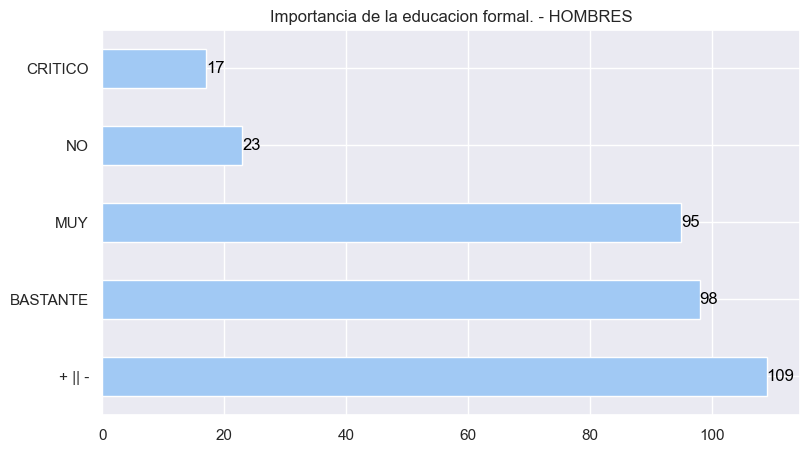

In [72]:
# Making a chart for this column.
fig = plt.figure(figsize=(9, 5))
ax1 = plt.subplot(111)
# Plot
import_df = (
    df["imp_ed_formal"]
    .value_counts()
    .plot(
        kind="barh",
        title="Importancia de la educacion formal. - HOMBRES",
    )
)
# Plot annotations.
for k, v in enumerate(df["imp_ed_formal"].value_counts().values):
    if v < 10:
        import_df.annotate(v, (v, k), va="center", color="red")
    else:
        import_df.annotate(v, (v, k), va="center", color="black")
plt.show()

### EDUCACION - MUJERES

In [73]:
#'educación'
#'carreras_o_especialidades'
#'importancia_educación_formal'

 - Grouped in this way, the content of the column makes no sense. We will try to separate each "category".

In [74]:
gen.get_group("MUJER")["educacion"].value_counts()

Ed. Universitaria                                          29
Ed. Universitaria;Autodidacta                               5
Ed. Basica;Ed. Secundaria;Ed. Universitaria                 5
Ed. Basica;Ed. Secundaria;Ed. Universitaria;Autodidacta     3
Ed. Universitaria;Master                                    2
Master                                                      2
Master;Autodidacta                                          1
Ed. Basica;Ed. Secundaria                                   1
Ed. Secundaria                                              1
Name: educacion, dtype: int64

<Figure size 900x500 with 0 Axes>

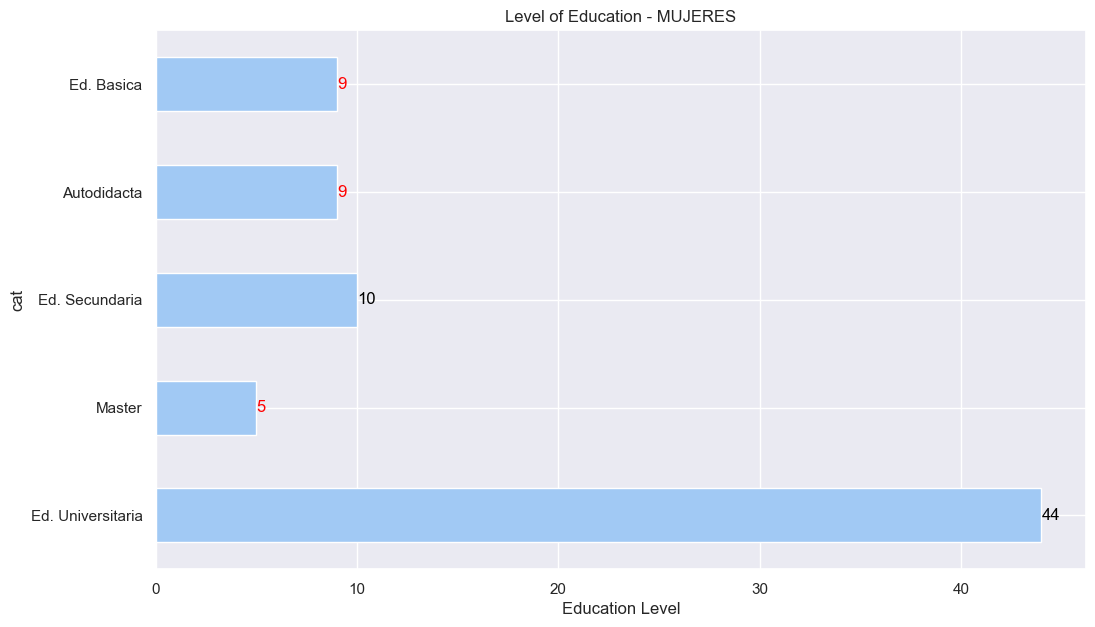

In [75]:
fig = plt.figure(figsize=(9, 5))


ed_mujeres_df = make_df(gen.get_group("MUJER"), "educacion").plot(
    kind="barh",
    title="Level of Education - MUJERES",
    xlabel="Education Level",
    legend=False,
)


for k, v in enumerate(
    [i for i in make_df(gen.get_group("MUJER"), "educacion")["count"]]
):
    if v < 10:
        ed_mujeres_df.annotate(v, (v, k), va="center", color="red")
    else:
        ed_mujeres_df.annotate(v, (v, k), va="center", color="black")

plt.show()

### Carreras o especialidades. - MUJERES
 - column name : 'carr_especialidades'

<Figure size 900x500 with 0 Axes>

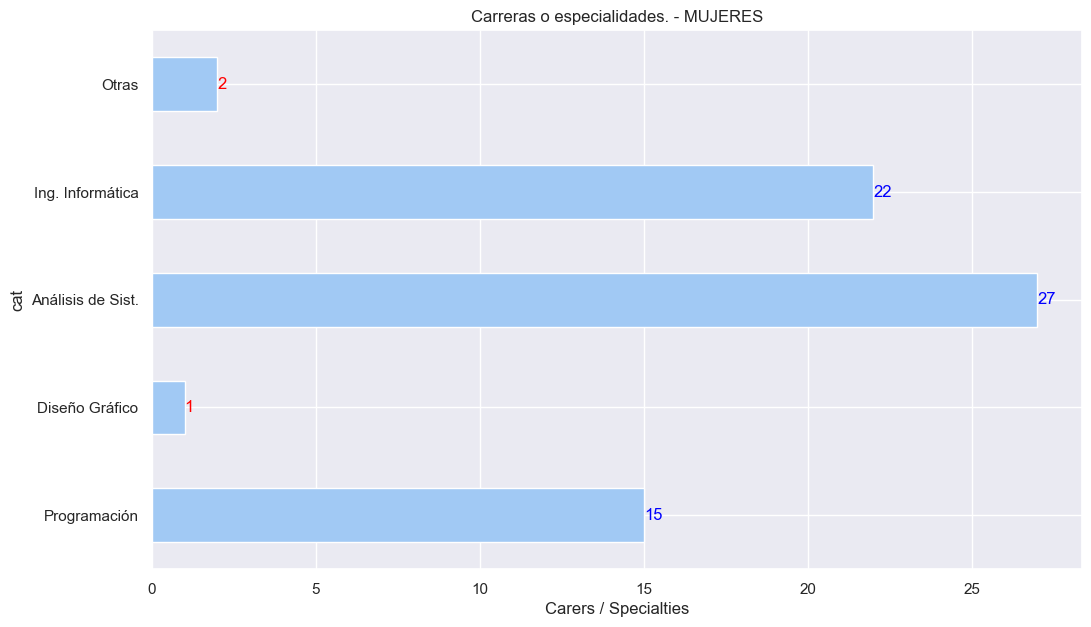

In [76]:
fig = plt.figure(figsize=(9, 5))


carr_mujeres_df = make_df(gen.get_group("MUJER"), "carr_especialidades").plot(
    kind="barh",
    xlabel="Carers / Specialties",
    title="Carreras o especialidades. - MUJERES",
    legend=False,
)


for k, v in enumerate(
    [i for i in make_df(gen.get_group("MUJER"), "carr_especialidades")["count"]]
):
    if v < 10:
        carr_mujeres_df.annotate(v, (v, k), va="center", color="red")
    else:
        carr_mujeres_df.annotate(v, (v, k), va="center", color="blue")

plt.show()

# Importancia de la educacion formal. - MUJERES

 - column name : 'imp_ed_formal'

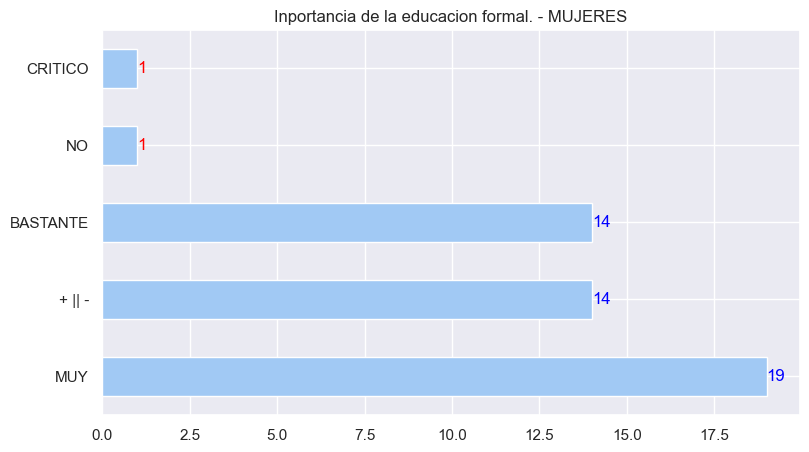

In [77]:
fig = plt.figure(figsize=(9, 5))

muj_import_df = (
    gen.get_group("MUJER")["imp_ed_formal"]
    .value_counts()
    .plot(kind="barh", title="Inportancia de la educacion formal. - MUJERES")
)

for k, v in enumerate(gen.get_group("MUJER")["imp_ed_formal"].value_counts().values):
    if v < 10:
        muj_import_df.annotate(v, (v, k), va="center", color="red")
    else:
        muj_import_df.annotate(v, (v, k), va="center", color="blue")

plt.show()

### EDUCACION - NO COMPARTO

In [78]:
#'educación'
#'carreras_o_especialidades'
#'importancia_educación_formal'

<Figure size 900x500 with 0 Axes>

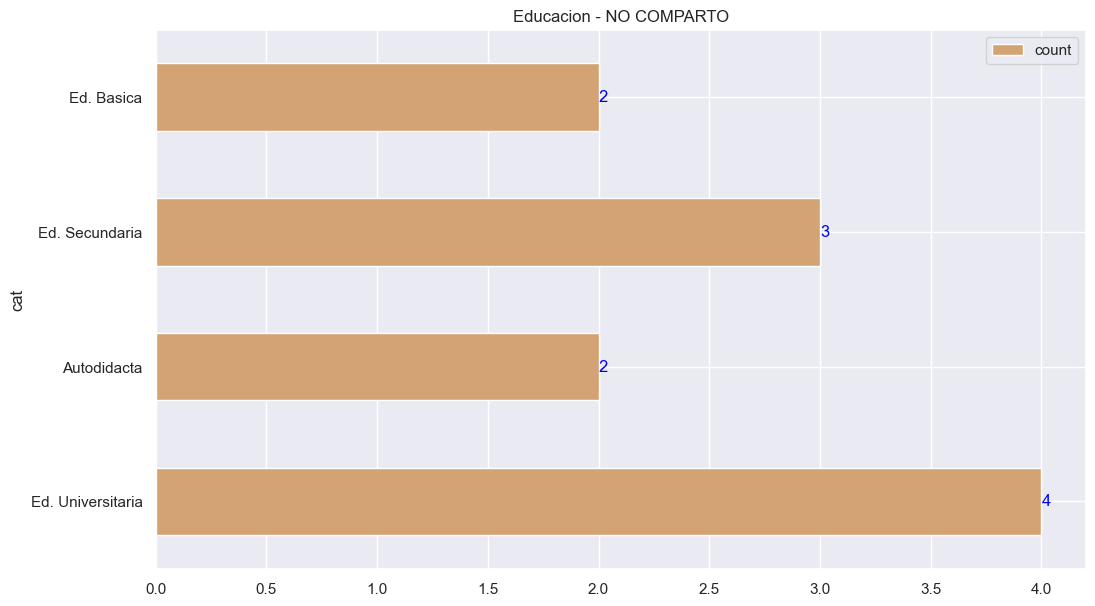

In [79]:
fig = plt.figure(figsize=(9, 5))
ed_no_comp_df = make_df(gen.get_group("NO COMPARTO"), "educacion").plot(
    kind="barh", title="Educacion - NO COMPARTO", color=color_neutro_light
)
for k, v in enumerate(
    [i for i in make_df(gen.get_group("NO COMPARTO"), "educacion")["count"]]
):
    ed_no_comp_df.annotate(v, (v, k), va="center", color="blue")

plt.show()

### Carreras o especialidades. - NO DEFINIDO

<Figure size 900x500 with 0 Axes>

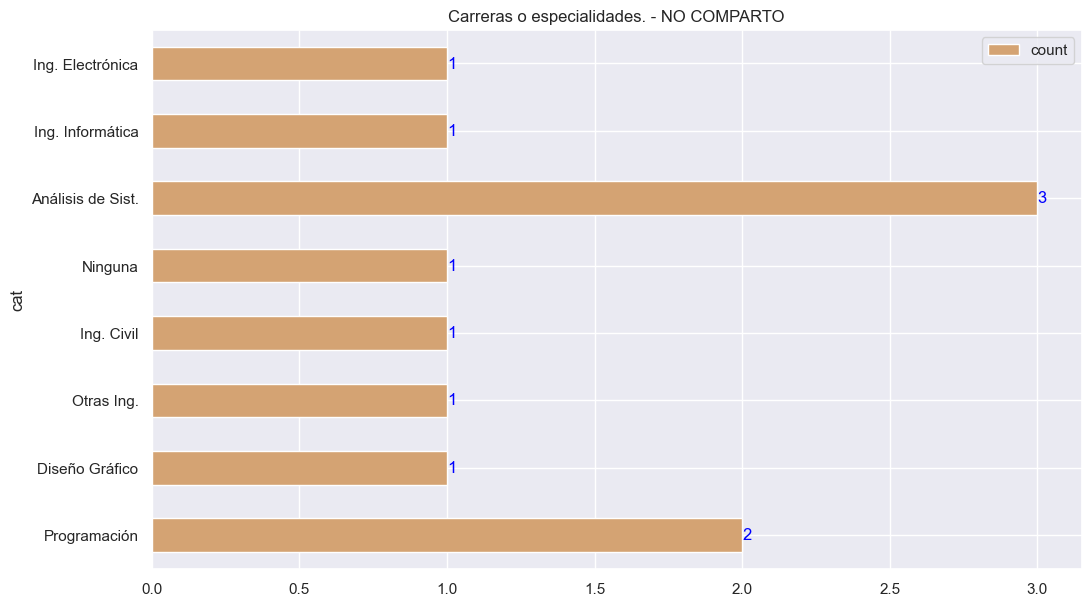

In [80]:
fig = plt.figure(figsize=(9, 5))


carr_no_comp_df = make_df(gen.get_group("NO COMPARTO"), "carr_especialidades").plot(
    kind="barh",
    title="Carreras o especialidades. - NO COMPARTO",
    color=color_neutro_light,
)


for k, v in enumerate(
    [i for i in make_df(gen.get_group("NO COMPARTO"), "carr_especialidades")["count"]]
):
    carr_no_comp_df.annotate(v, (v, k), va="center", color="blue")

plt.show()

### Importancia de la educacion formal. - NO DEFINIDO

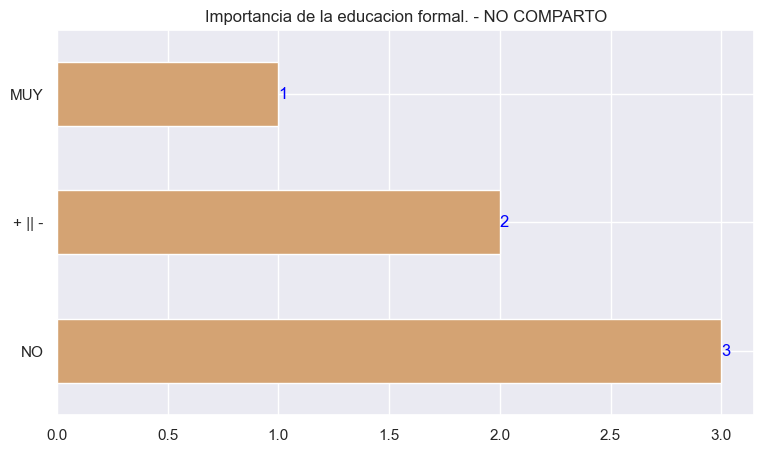

In [81]:
fig = plt.figure(figsize=(9, 5))
imp_ed_no_comp = (
    gen.get_group("NO COMPARTO")["imp_ed_formal"]
    .value_counts()
    .plot(
        kind="barh",
        title="Importancia de la educacion formal. - NO COMPARTO",
        color=color_neutro_light,
    )
)

for k, v in enumerate(
    [i for i in gen.get_group("NO COMPARTO")["imp_ed_formal"].value_counts().values]
):
    imp_ed_no_comp.annotate(v, (v, k), va="center", color="blue")

plt.show()

In [82]:
df.columns

Index(['marca_temp', 'modalidad', 'trabajo', 'tipo_de_trabajo', 'devops',
       'programar_x_trabajo', 'exp_en_IT', 'exp_en_programacion',
       '1_linea_de_codigo', 'educacion', 'carr_especialidades',
       'imp_ed_formal', 'genero', 'edad_actual', 'salario_mensual',
       'prog_script_leng', 'lib_frameworks', 'otras_lib_frameworks', 'db',
       'plataformas', 'leng_fav', 'leng_mas_odiado', 'fram_fav',
       'fram_mas_odiado', 'herramientas'],
      dtype='object')